**Italian COVID 19 data from the CIVIL PROTECTION - DataFrame pandas example**

Load the COVID 19 data for the Italian provinces and regions and apply and apply some DataFrame operations.

#### Table of Contents
1. [Read Data with pandas](#section1)
1. [Get English names' columns](#section2)
1. [pandas' swiss knife](#section3)
1. [Data selection](#section4)
1. [Data manipulation](#section5)
1. [Plotting df](#section6)

## Setup

In [1]:
%run ../scripts/setup.ipynb

In [2]:
%run ../scripts/conf_files.ipynb

<a id='section1'></a>
## 1. Read Data with `pandas`

`pandas` has several function to read many data formats: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [3]:
covid_regions_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
covid_provinces_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"

We are going to read data with the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

In [4]:
cr_df = pd.read_csv(covid_regions_url)
cp_df = pd.read_csv(covid_provinces_url)

<a id='section2'></a>
## 2. Get names' columns

* Define a `province_it_en` and `region_it_en` dictionary that contains the columns values in English. 
* Load the `province_it_en` dictionary from the configuration file `./conf/province_it_en.json`.
* Load the `region_it_en` dictionary from the configuration file `./conf/region_it_en.json`.

In [5]:
province_it_en = load_conf_file('covid_province_it_en')
region_it_en = load_conf_file('covid_region_it_en')

<a id='section3'></a>
## 3. pandas' swiss knife

__Bunch of panda's attributes and methods to start the data inspection.__

This functions/attributes of the pandas dataframe are very usefull, especially during the first data inspection and particularly using a jupyter notebook.

### .columns

[.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)

In [6]:
cr_df.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')

In [7]:
region_it_en

{'data': 'date',
 'stato': 'country',
 'codice_regione': 'region_code',
 'denominazione_regione': 'region_name',
 'lat': 'latitude',
 'long': 'longitude',
 'ricoverati_con_sintomi': 'hospitalized_symptoms',
 'terapia_intensiva': 'intensive_care',
 'totale_ospedalizzati': 'total_hospitalized',
 'isolamento_domiciliare': 'home_isolation',
 'totale_positivi': 'total_positives',
 'variazione_totale_positivi': 'change_total_positives',
 'nuovi_positivi': 'new_positives',
 'dimessi_guariti': 'hospital_discharged',
 'deceduti': 'deceased_patients',
 'casi_da_sospetto_diagnostico': 'dubious_diagnosis_cases',
 'casi_da_screening': 'screening_cases',
 'totale_casi': 'total_cases',
 'tamponi': 'swab_tests',
 'casi_testati': 'test_cases',
 'ingressi_terapia_intensiva': 'new_intensive_care',
 'totale_positivi_test_molecolare': 'molecular_test_total_positives',
 'totale_positivi_test_antigenico_rapido': 'antigen_test_total_positives',
 'tamponi_test_molecolare': 'molecular_swab_tests',
 'tamponi_tes

In [8]:
cp_df.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note', 'codice_nuts_1', 'codice_nuts_2',
       'codice_nuts_3'],
      dtype='object')

In [9]:
province_it_en

{'data': 'date',
 'stato': 'country',
 'codice_regione': 'region_code',
 'denominazione_regione': 'region_name',
 'codice_provincia': 'province_code',
 'denominazione_provincia': 'province_name',
 'sigla_provincia': 'province_short_name',
 'lat': 'latitude',
 'long': 'longitude',
 'totale_casi': 'total_cases'}

Before renaming the columns with the `rename()` function, removed unuseful columns with the `drop()` function without the `inplace` parameter.

###   .drop()

[.drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [10]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying axis (``labels, axis=0``
        is equivalent to ``index=labels``).
    columns : single label or list-like
        Alternative to specifying axis (``labels, axis=1``
        is equivalent to ``columns=labels``).
    level : 

In [11]:
cp_df_new = cp_df.drop(columns=['note','codice_nuts_1','codice_nuts_2', 'codice_nuts_3'])
cr_df_new = cr_df.drop(columns=['note','note_test','note_casi','codice_nuts_1','codice_nuts_2'])

The previous lines are equivalent to 

```py
cp_df_new = cp_df.drop(['note','codice_nuts_1','codice_nuts_2', 'codice_nuts_3'], axis=1)
```

In [12]:
cp_df_new.rename(columns=province_it_en, inplace=True)
cp_df_new.columns

Index(['date', 'country', 'region_code', 'region_name', 'province_code',
       'province_name', 'province_short_name', 'latitude', 'longitude',
       'total_cases'],
      dtype='object')

In [13]:
cr_df_new.rename(columns=region_it_en, inplace=True)
cr_df_new.columns

Index(['date', 'country', 'region_code', 'region_name', 'latitude',
       'longitude', 'hospitalized_symptoms', 'intensive_care',
       'total_hospitalized', 'home_isolation', 'total_positives',
       'change_total_positives', 'new_positives', 'hospital_discharged',
       'deceased_patients', 'dubious_diagnosis_cases', 'screening_cases',
       'total_cases', 'swab_tests', 'test_cases', 'new_intensive_care',
       'molecular_test_total_positives', 'antigen_test_total_positives',
       'molecular_swab_tests', 'antigen_swab_tests'],
      dtype='object')

### .head() .tail()

[.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

[.tail()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)

In [14]:
cr_df_new.head(2)

date country  region_code region_name   latitude  longitude  \
0  2020-02-24T18:00:00     ITA           13     Abruzzo  42.351222  13.398438   
1  2020-02-24T18:00:00     ITA           17  Basilicata  40.639471  15.805148   

   hospitalized_symptoms  intensive_care  total_hospitalized  home_isolation  \
0                      0               0                   0               0   
1                      0               0                   0               0   

   ...  dubious_diagnosis_cases  screening_cases  total_cases  swab_tests  \
0  ...                      NaN              NaN            0           5   
1  ...                      NaN              NaN            0           0   

   test_cases  new_intensive_care  molecular_test_total_positives  \
0         NaN                 NaN                             NaN   
1         NaN                 NaN                             NaN   

   antigen_test_total_positives  molecular_swab_tests  antigen_swab_tests  
0                           NaN                   NaN                 NaN  
1                           NaN                   NaN                 NaN  

[2 rows x 25 columns]

In [15]:
cr_df_new.tail(2)

date country  region_code    region_name   latitude  \
13417  2021-11-23T17:00:00     ITA            2  Valle d'Aosta  45.737503   
13418  2021-11-23T17:00:00     ITA            5         Veneto  45.434905   

       longitude  hospitalized_symptoms  intensive_care  total_hospitalized  \
13417   7.320149                     10               1                  11   
13418  12.338452                    365              69                 434   

       home_isolation  ...  dubious_diagnosis_cases  screening_cases  \
13417             432  ...                      NaN              NaN   
13418           22218  ...                      NaN              NaN   

       total_cases  swab_tests  test_cases  new_intensive_care  \
13417        12819      271758     95998.0                 0.0   
13418       503303    15813271   2265539.0                19.0   

       molecular_test_total_positives  antigen_test_total_positives  \
13417                         11833.0                         986.0   
13418                        486391.0                       16912.0   

       molecular_swab_tests  antigen_swab_tests  
13417              115705.0            156053.0  
13418             7448659.0           8364612.0  

[2 rows x 25 columns]

In [16]:
cp_df_new.head(2)

date country  region_code region_name  province_code  \
0  2020-02-24T18:00:00     ITA           13     Abruzzo             66   
1  2020-02-24T18:00:00     ITA           13     Abruzzo             67   

  province_name province_short_name   latitude  longitude  total_cases  
0      L'Aquila                  AQ  42.351222  13.398438            0  
1        Teramo                  TE  42.658918  13.704400            0

In [17]:
cp_df_new.tail(2)

date country  region_code region_name  province_code  \
92647  2021-11-23T17:00:00     ITA            5      Veneto            899   
92648  2021-11-23T17:00:00     ITA            5      Veneto            999   

                              province_name province_short_name  latitude  \
92647    Fuori Regione / Provincia Autonoma                 NaN       NaN   
92648  In fase di definizione/aggiornamento                 NaN       NaN   

       longitude  total_cases  
92647        NaN         6259  
92648        NaN         1779

### len() (not pandas)

[len()](https://docs.python.org/3/library/functions.html#len)

In [18]:
len(cr_df_new)

13419

### .unique()  .nunique()

[.unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)

[.nunique()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)

In [19]:
cr_df_new['region_name'].unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [20]:
cr_df_new['region_name'].nunique()

21

### .shape

[.shape()](https://www.google.com/search?client=safari&rls=en&q=pandas+shape&ie=UTF-8&oe=UTF-8)

In [21]:
cr_df_new.shape

(13419, 25)

### .describe()

[.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [22]:
cr_df_new.describe()

region_code      latitude     longitude  hospitalized_symptoms  \
count  13419.000000  13419.000000  13419.000000           13419.000000   
mean      11.857143     43.046293     12.225955             549.786646   
std        6.274032      2.488874      2.659047            1102.550761   
min        1.000000     38.115697      7.320149               0.000000   
25%        7.000000     41.125596     11.121231              34.000000   
50%       12.000000     43.616760     12.388247             158.000000   
75%       17.000000     45.434905     13.768136             512.000000   
max       22.000000     46.499335     16.867367           12077.000000   

       intensive_care  total_hospitalized  home_isolation  total_positives  \
count    13419.000000        13419.000000    13419.000000     13419.000000   
mean        64.687235          614.473880     9912.401744     10526.875177   
std        123.428345         1221.815448    18498.088910     19362.021508   
min          0.000000            0.000000        0.000000         0.000000   
25%          3.000000           38.000000      503.000000       570.500000   
50%         19.000000          178.000000     2480.000000      2810.000000   
75%         64.000000          575.000000     9879.500000     10579.500000   
max       1381.000000        13328.000000   155066.000000    164406.000000   

       change_total_positives  new_positives  ...  dubious_diagnosis_cases  \
count            13419.000000   13419.000000  ...              3402.000000   
mean                11.497802     367.823832  ...             16472.772193   
std                825.509681     726.377199  ...             32188.413270   
min             -48092.000000    -229.000000  ...                 0.000000   
25%                -43.000000      17.000000  ...              2052.250000   
50%                  2.000000     101.000000  ...              5290.500000   
75%                 71.000000     381.000000  ...             19285.750000   
max              10263.000000   11489.000000  ...            305002.000000   

       screening_cases    total_cases    swab_tests    test_cases  \
count       3402.00000   13419.000000  1.341900e+04  1.226400e+04   
mean        6319.39565  107280.397645  1.843538e+06  8.632896e+05   
std        15054.35195  163765.452772  2.781726e+06  1.094983e+06   
min            0.00000       0.000000  0.000000e+00  3.482000e+03   
25%          117.00000    5667.500000  1.548685e+05  1.466212e+05   
50%         1493.00000   34238.000000  6.602890e+05  4.192665e+05   
75%         5469.00000  113860.000000  2.130023e+06  1.090804e+06   
max       113150.00000  918333.000000  1.973909e+07  6.058419e+06   

       new_intensive_care  molecular_test_total_positives  \
count         7476.000000                     6573.000000   
mean             4.588015                   185015.093412   
std              7.754451                   185323.558542   
min              0.000000                     7382.000000   
25%              0.000000                    52627.000000   
50%              2.000000                    98363.000000   
75%              5.000000                   298669.000000   
max             86.000000                   842727.000000   

       antigen_test_total_positives  molecular_swab_tests  antigen_swab_tests  
count                   6573.000000          6.573000e+03        6.573000e+03  
mean                    6233.836300          2.343625e+06        9.440219e+05  
std                    11701.140211          2.281898e+06        1.261196e+06  
min                        0.000000          6.615200e+04        0.000000e+00  
25%                        0.000000          6.808570e+05        9.602300e+04  
50%                      369.000000          1.373980e+06        4.236860e+05  
75%                    11588.000000          3.471346e+06        1.289077e+06  
max                    75606.000000          1.175495e+07        8.364612e+06  

[8 rows x 22 columns]

In [23]:
len(cr_df_new.columns)

25

### .info()

[.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [24]:
cr_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13419 entries, 0 to 13418
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            13419 non-null  object 
 1   country                         13419 non-null  object 
 2   region_code                     13419 non-null  int64  
 3   region_name                     13419 non-null  object 
 4   latitude                        13419 non-null  float64
 5   longitude                       13419 non-null  float64
 6   hospitalized_symptoms           13419 non-null  int64  
 7   intensive_care                  13419 non-null  int64  
 8   total_hospitalized              13419 non-null  int64  
 9   home_isolation                  13419 non-null  int64  
 10  total_positives                 13419 non-null  int64  
 11  change_total_positives          13419 non-null  int64  
 12  new_positives                   

### missing values

[.isnull()](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html)

In [25]:
cr_df_new.isnull().sum(0)

date                                  0
country                               0
region_code                           0
region_name                           0
latitude                              0
longitude                             0
hospitalized_symptoms                 0
intensive_care                        0
total_hospitalized                    0
home_isolation                        0
total_positives                       0
change_total_positives                0
new_positives                         0
hospital_discharged                   0
deceased_patients                     0
dubious_diagnosis_cases           10017
screening_cases                   10017
total_cases                           0
swab_tests                            0
test_cases                         1155
new_intensive_care                 5943
molecular_test_total_positives     6846
antigen_test_total_positives       6846
molecular_swab_tests               6846
antigen_swab_tests                 6846


### sort_values

If ```inplace=True``` is omitted the dataframe is not reordered. This argument is present in several pandas dataframe's function.

[.sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [26]:
cr_df_new.sort_values(by=['deceased_patients'], ascending=False)# , inplace=True)

date country  region_code   region_name   latitude  \
13406  2021-11-23T17:00:00     ITA            3     Lombardia  45.466794   
13385  2021-11-22T17:00:00     ITA            3     Lombardia  45.466794   
13364  2021-11-21T17:00:00     ITA            3     Lombardia  45.466794   
13343  2021-11-20T17:00:00     ITA            3     Lombardia  45.466794   
13322  2021-11-19T17:00:00     ITA            3     Lombardia  45.466794   
...                    ...     ...          ...           ...        ...   
216    2020-03-05T17:00:00     ITA           12         Lazio  41.892770   
220    2020-03-05T17:00:00     ITA           14        Molise  41.557748   
221    2020-03-05T17:00:00     ITA           21  P.A. Bolzano  46.499335   
222    2020-03-05T17:00:00     ITA           22   P.A. Trento  46.068935   
0      2020-02-24T18:00:00     ITA           13       Abruzzo  42.351222   

       longitude  hospitalized_symptoms  intensive_care  total_hospitalized  \
13406   9.190347                    736              67                 803   
13385   9.190347                    686              65                 751   
13364   9.190347                    666              61                 727   
13343   9.190347                    656              58                 714   
13322   9.190347                    623              57                 680   
...          ...                    ...             ...                 ...   
216    12.483667                     20               7                  27   
220    14.659161                      4               0                   4   
221    11.356624                      1               0                   1   
222    11.121231                      2               0                   2   
0      13.398438                      0               0                   0   

       home_isolation  ...  dubious_diagnosis_cases  screening_cases  \
13406           22051  ...                      NaN              NaN   
13385           21772  ...                      NaN              NaN   
13364           21237  ...                      NaN              NaN   
13343           20144  ...                      NaN              NaN   
13322           18779  ...                      NaN              NaN   
...               ...  ...                      ...              ...   
216                14  ...                      NaN              NaN   
220                 3  ...                      NaN              NaN   
221                 0  ...                      NaN              NaN   
222                 5  ...                      NaN              NaN   
0                   0  ...                      NaN              NaN   

       total_cases  swab_tests  test_cases  new_intensive_care  \
13406       918333    19739094   6058419.0                 7.0   
13385       916665    19585585   6043652.0                 5.0   
13364       916003    19544294   6038260.0                 8.0   
13343       914572    19437739   6025302.0                 7.0   
13322       912642    19319460   6010699.0                 3.0   
...            ...         ...         ...                 ...   
216             44        1175         NaN                 NaN   
220              7          24         NaN                 NaN   
221              1          20         NaN                 NaN   
222              7         122         NaN                 NaN   
0                0           5         NaN                 NaN   

       molecular_test_total_positives  antigen_test_total_positives  \
13406                        842727.0                       75606.0   
13385                        841877.0                       74788.0   
13364                        841452.0                       74551.0   
13343                        840556.0                       74016.0   
13322                        839199.0                       73443.0   
...                               ...                           ...   
216  

### correlations

[.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

In [27]:
cr_df_new.corr()

region_code  latitude  longitude  \
region_code                        1.000000 -0.541392   0.504055   
latitude                          -0.541392  1.000000  -0.547164   
longitude                          0.504055 -0.547164   1.000000   
hospitalized_symptoms             -0.285005  0.121279  -0.188280   
intensive_care                    -0.273046  0.121915  -0.169970   
total_hospitalized                -0.284768  0.121756  -0.187072   
home_isolation                    -0.125141 -0.028048  -0.005603   
total_positives                   -0.137527 -0.019113  -0.017158   
change_total_positives            -0.004877  0.002003  -0.001544   
new_positives                     -0.203845  0.066862  -0.088289   
hospital_discharged               -0.292676  0.132756  -0.149640   
deceased_patients                 -0.428053  0.249792  -0.280233   
dubious_diagnosis_cases           -0.380589  0.245819  -0.283101   
screening_cases                   -0.263400  0.121292  -0.170034   
total_cases                       -0.302315  0.129511  -0.150510   
swab_tests                        -0.273225  0.124137  -0.134523   
test_cases                        -0.229272  0.003307  -0.105286   
new_intensive_care                -0.205110  0.050861  -0.041259   
molecular_test_total_positives    -0.427816  0.152004  -0.187525   
antigen_test_total_positives      -0.310509  0.408702  -0.298187   
molecular_swab_tests              -0.422395  0.173552  -0.173627   
antigen_swab_tests                -0.280384  0.139369  -0.204055   

                                hospitalized_symptoms  intensive_care  \
region_code                                 -0.285005       -0.273046   
latitude                                     0.121279        0.121915   
longitude                                   -0.188280       -0.169970   
hospitalized_symptoms                        1.000000        0.962554   
intensive_care                               0.962554        1.000000   
total_hospitalized                           0.999625        0.969617   
home_isolation                               0.688800        0.683144   
total_positives                              0.721146        0.713849   
change_total_positives                       0.019301       -0.001912   
new_positives                                0.701650        0.701010   
hospital_discharged                          0.211289        0.258082   
deceased_patients                            0.402790        0.424426   
dubious_diagnosis_cases                      0.734274        0.750390   
screening_cases                              0.859354        0.844135   
total_cases                                  0.295172        0.338346   
swab_tests                                   0.158956        0.204144   
test_cases                                   0.309695        0.370653   
new_intensive_care                           0.824378        0.839588   
molecular_test_total_positives               0.419262        0.444151   
antigen_test_total_positives                 0.129774        0.169074   
molecular_swab_tests                         0.333316        0.370257   
antigen_swab_tests                          -0.020348        0.014134   

                                total_hospitalized  home_isolation  \
region_code                              -0.284768       -0.125141   
latitude                                  0.121756       -0.028048   
longitude                                -0.187072       -0.005603   
hospitalized_symptoms                     0.999625        0.688800   
intensive_care                            0.969617        0.683144   
total_hospitalized                        1.000000        0.690576   
home_isolation                            0.690576        1.000000   
total_positives                           0.722866        0.998958   
change_total_positives                    0.017224        0.018434   
new_positives                             0.703976        0.815970   
hospital_discharg

In [28]:
help(pd.DataFrame.corr)

Help on function corr in module pandas.core.frame:

corr(self, method='pearson', min_periods=1) -> 'DataFrame'
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    
            .. versionadded:: 0.24.0
    
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and Spearman correlation.
    
    Returns
    -------
    

<a id='section4'></a>
## 4. Data selection

Here we will see how to "reduce" the data present in a dataframe acting on the dataframe's columns and on the rows  as well.

### column selection

In [29]:
cr_df_new.columns

Index(['date', 'country', 'region_code', 'region_name', 'latitude',
       'longitude', 'hospitalized_symptoms', 'intensive_care',
       'total_hospitalized', 'home_isolation', 'total_positives',
       'change_total_positives', 'new_positives', 'hospital_discharged',
       'deceased_patients', 'dubious_diagnosis_cases', 'screening_cases',
       'total_cases', 'swab_tests', 'test_cases', 'new_intensive_care',
       'molecular_test_total_positives', 'antigen_test_total_positives',
       'molecular_swab_tests', 'antigen_swab_tests'],
      dtype='object')

In [30]:
cr_df_new['date']

0        2020-02-24T18:00:00
1        2020-02-24T18:00:00
2        2020-02-24T18:00:00
3        2020-02-24T18:00:00
4        2020-02-24T18:00:00
                ...         
13414    2021-11-23T17:00:00
13415    2021-11-23T17:00:00
13416    2021-11-23T17:00:00
13417    2021-11-23T17:00:00
13418    2021-11-23T17:00:00
Name: date, Length: 13419, dtype: object

In [31]:
cr_df_new.date

0        2020-02-24T18:00:00
1        2020-02-24T18:00:00
2        2020-02-24T18:00:00
3        2020-02-24T18:00:00
4        2020-02-24T18:00:00
                ...         
13414    2021-11-23T17:00:00
13415    2021-11-23T17:00:00
13416    2021-11-23T17:00:00
13417    2021-11-23T17:00:00
13418    2021-11-23T17:00:00
Name: date, Length: 13419, dtype: object

#### Pandas series

https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [32]:
type(cr_df_new['date'])

pandas.core.series.Series

In [33]:
cr_df_new[['region_name','total_positives']]

region_name  total_positives
0             Abruzzo                0
1          Basilicata                0
2            Calabria                0
3            Campania                0
4      Emilia-Romagna               18
...               ...              ...
13414         Sicilia            10903
13415         Toscana             8184
13416          Umbria             1645
13417   Valle d'Aosta              443
13418          Veneto            22652

[13419 rows x 2 columns]

### row selection

* __loc__ gets rows (and/or columns) with particular __labels__ (if indexes are strings uses indexes labes).

* __iloc__ gets rows (and/or columns) at integer locations (always numbers).

In [34]:
cr_df_new.index.values

array([    0,     1,     2, ..., 13416, 13417, 13418], dtype=int64)

[.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [35]:
cr_df_new.loc[1:3]

date country  region_code region_name   latitude  longitude  \
1  2020-02-24T18:00:00     ITA           17  Basilicata  40.639471  15.805148   
2  2020-02-24T18:00:00     ITA           18    Calabria  38.905976  16.594402   
3  2020-02-24T18:00:00     ITA           15    Campania  40.839566  14.250850   

   hospitalized_symptoms  intensive_care  total_hospitalized  home_isolation  \
1                      0               0                   0               0   
2                      0               0                   0               0   
3                      0               0                   0               0   

   ...  dubious_diagnosis_cases  screening_cases  total_cases  swab_tests  \
1  ...                      NaN              NaN            0           0   
2  ...                      NaN              NaN            0           1   
3  ...                      NaN              NaN            0          10   

   test_cases  new_intensive_care  molecular_test_total_positives  \
1         NaN                 NaN                             NaN   
2         NaN                 NaN                             NaN   
3         NaN                 NaN                             NaN   

   antigen_test_total_positives  molecular_swab_tests  antigen_swab_tests  
1                           NaN                   NaN                 NaN  
2                           NaN                   NaN                 NaN  
3                           NaN                   NaN                 NaN  

[3 rows x 25 columns]

In [36]:
cr_df_new.loc[12557]

date                              2021-10-13T17:00:00
country                                           ITA
region_code                                         5
region_name                                    Veneto
latitude                                    45.434905
longitude                                   12.338452
hospitalized_symptoms                             144
intensive_care                                     33
total_hospitalized                                177
home_isolation                                   8946
total_positives                                  9123
change_total_positives                           -108
new_positives                                     348
hospital_discharged                            452440
deceased_patients                               11799
dubious_diagnosis_cases                           NaN
screening_cases                                   NaN
total_cases                                    473362
swab_tests                  

#### Mask

In [37]:
cp_df_new['region_name']=='Emilia-Romagna'

0        False
1        False
2        False
3        False
4        False
         ...  
92644    False
92645    False
92646    False
92647    False
92648    False
Name: region_name, Length: 92649, dtype: bool

In [38]:
m = cp_df_new['region_name']=='Emilia-Romagna'

In [39]:
m.unique()

array([False,  True])

In [40]:
cp_df_new[cp_df_new['region_name']=='Emilia-Romagna'].head(3)

date country  region_code     region_name  province_code  \
20  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             33   
21  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             34   
22  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             35   

         province_name province_short_name   latitude  longitude  total_cases  
20            Piacenza                  PC  45.051935   9.692633            0  
21               Parma                  PR  44.801074  10.328350            0  
22  Reggio nell'Emilia                  RE  44.697353  10.630080            0

In [41]:
cp_df_new[(cp_df_new['region_name']=='Emilia-Romagna') & (cp_df_new['total_cases'] > 1000)].head(3)

date country  region_code     region_name  province_code  \
2580  2020-03-15T17:00:00     ITA            8  Emilia-Romagna             33   
2708  2020-03-16T17:00:00     ITA            8  Emilia-Romagna             33   
2836  2020-03-17T17:00:00     ITA            8  Emilia-Romagna             33   

     province_name province_short_name   latitude  longitude  total_cases  
2580      Piacenza                  PC  45.051935   9.692633         1012  
2708      Piacenza                  PC  45.051935   9.692633         1073  
2836      Piacenza                  PC  45.051935   9.692633         1204

actually what happens ....

In [42]:
m1 = cp_df_new['region_name']=='Emilia-Romagna'
m2 = cp_df_new['total_cases'] > 1000

In [43]:
cp_df_new[m1 & m2].head(3)

date country  region_code     region_name  province_code  \
2580  2020-03-15T17:00:00     ITA            8  Emilia-Romagna             33   
2708  2020-03-16T17:00:00     ITA            8  Emilia-Romagna             33   
2836  2020-03-17T17:00:00     ITA            8  Emilia-Romagna             33   

     province_name province_short_name   latitude  longitude  total_cases  
2580      Piacenza                  PC  45.051935   9.692633         1012  
2708      Piacenza                  PC  45.051935   9.692633         1073  
2836      Piacenza                  PC  45.051935   9.692633         1204

# .query

The best choice if you have several conditions to be applied on the row selection.

[.query()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

In [44]:
cp_df_new.query("(region_name == 'Emilia-Romagna') and (total_cases > 1000)").head(3)

date country  region_code     region_name  province_code  \
2580  2020-03-15T17:00:00     ITA            8  Emilia-Romagna             33   
2708  2020-03-16T17:00:00     ITA            8  Emilia-Romagna             33   
2836  2020-03-17T17:00:00     ITA            8  Emilia-Romagna             33   

     province_name province_short_name   latitude  longitude  total_cases  
2580      Piacenza                  PC  45.051935   9.692633         1012  
2708      Piacenza                  PC  45.051935   9.692633         1073  
2836      Piacenza                  PC  45.051935   9.692633         1204

In [45]:
nc = 1000
cp_df_new.query("(region_name == 'Emilia-Romagna') and (total_cases > @nc)").head(3)

date country  region_code     region_name  province_code  \
2580  2020-03-15T17:00:00     ITA            8  Emilia-Romagna             33   
2708  2020-03-16T17:00:00     ITA            8  Emilia-Romagna             33   
2836  2020-03-17T17:00:00     ITA            8  Emilia-Romagna             33   

     province_name province_short_name   latitude  longitude  total_cases  
2580      Piacenza                  PC  45.051935   9.692633         1012  
2708      Piacenza                  PC  45.051935   9.692633         1073  
2836      Piacenza                  PC  45.051935   9.692633         1204

with f-strings

In [46]:
cp_df_new.query(f"(region_name == 'Emilia-Romagna') and (total_cases > {nc})").head(3)

date country  region_code     region_name  province_code  \
2580  2020-03-15T17:00:00     ITA            8  Emilia-Romagna             33   
2708  2020-03-16T17:00:00     ITA            8  Emilia-Romagna             33   
2836  2020-03-17T17:00:00     ITA            8  Emilia-Romagna             33   

     province_name province_short_name   latitude  longitude  total_cases  
2580      Piacenza                  PC  45.051935   9.692633         1012  
2708      Piacenza                  PC  45.051935   9.692633         1073  
2836      Piacenza                  PC  45.051935   9.692633         1204

### AND or OR

In [47]:
cp_df_new.query(f"(region_name == 'Emilia-Romagna') or (total_cases > {nc})").head(3)

date country  region_code     region_name  province_code  \
20  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             33   
21  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             34   
22  2020-02-24T18:00:00     ITA            8  Emilia-Romagna             35   

         province_name province_short_name   latitude  longitude  total_cases  
20            Piacenza                  PC  45.051935   9.692633            0  
21               Parma                  PR  44.801074  10.328350            0  
22  Reggio nell'Emilia                  RE  44.697353  10.630080            0

#### .isin
--> avoid OR OR OR OR OR OR....

[.isin()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)

In [48]:
cp_df_new['region_name'].unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [49]:
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania']

In [50]:
cp_df_new[cp_df_new['region_name'].isin(regions)].head(2)

date country  region_code region_name  province_code  \
0  2020-02-24T18:00:00     ITA           13     Abruzzo             66   
1  2020-02-24T18:00:00     ITA           13     Abruzzo             67   

  province_name province_short_name   latitude  longitude  total_cases  
0      L'Aquila                  AQ  42.351222  13.398438            0  
1        Teramo                  TE  42.658918  13.704400            0

In [51]:
cp_df_new[cp_df_new['region_name'].isin(regions)].tail(2)

date country  region_code region_name  province_code  \
92522  2021-11-23T17:00:00     ITA           15    Campania            883   
92523  2021-11-23T17:00:00     ITA           15    Campania            983   

                              province_name province_short_name  latitude  \
92522    Fuori Regione / Provincia Autonoma                 NaN       NaN   
92523  In fase di definizione/aggiornamento                 NaN       NaN   

       longitude  total_cases  
92522        NaN         1186  
92523        NaN         7355

---

<a id='section4'></a>
## 5. Data manipulation

---

Here we will see how is possible to modify the values stored in a pandas dataframe and how to add new data combining one or more data from the same row, from multiple columns or from variables/object defined outside to the pandas dataframe.

### fill NA/NaN values

[.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [52]:
cp_df_new['province_short_name'] = cp_df_new['province_short_name'].fillna(0)

In [53]:
cp_df_new.fillna(0, inplace=True)

### change columns data types

#### to_numeric
convert one or more columns of a DataFrame to numeric values 

[.to_numeric()](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html)

In [54]:
s = pd.Series(["8", 6, "7.5", 3, "0.9"]) # mixed string and numeric values
s

0      8
1      6
2    7.5
3      3
4    0.9
dtype: object

In [55]:
pd.to_numeric(s) # convert everything to float values

0    8.0
1    6.0
2    7.5
3    3.0
4    0.9
dtype: float64

#### astype()
general purpose

[.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

In [56]:
s.astype(str)

0      8
1      6
2    7.5
3      3
4    0.9
dtype: object

### group-by
sql-like concept

[.groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

https://goc.egi.eu/portal/index.php?Page_Type=Downtime&id=31280

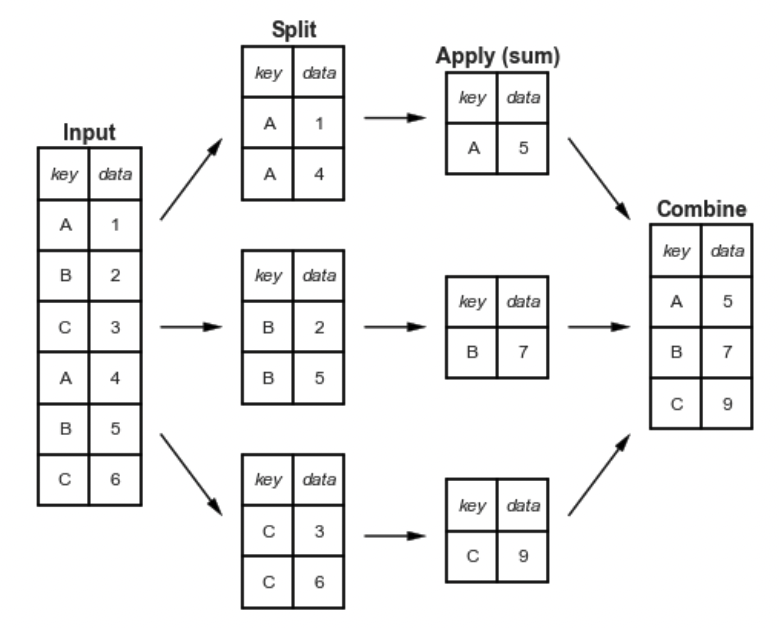

In [57]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

key  data
0   A     0
1   B     1
2   C     2
3   A     3
4   B     4
5   C     5

In [58]:
df.groupby('key').sum()

data
key      
A       3
B       5
C       7

# Apply a function to each row of the dataframe, thas has in input some of the dataframe columns
### example:
What if we want to add the population for each region for reach row as a new column ?

#### create a dictionary from a pandas dataframe

In [59]:
population_regions = pd.read_csv(f'{DATA_PATH}/population_regions.csv')
population_regions.head(2)
populations = population_regions.set_index('regions')['population'].to_dict()

In [60]:
cp_df_new.tail(3)

date country  region_code region_name  province_code  \
92646  2021-11-23T17:00:00     ITA            5      Veneto             29   
92647  2021-11-23T17:00:00     ITA            5      Veneto            899   
92648  2021-11-23T17:00:00     ITA            5      Veneto            999   

                              province_name province_short_name   latitude  \
92646                                Rovigo                  RO  45.071073   
92647    Fuori Regione / Provincia Autonoma                   0   0.000000   
92648  In fase di definizione/aggiornamento                   0   0.000000   

       longitude  total_cases  
92646   11.79007        17059  
92647    0.00000         6259  
92648    0.00000         1779

<div>
<img src="attachment:dont.jpeg" width="10"/>
</div>

### Best practice

This is the best trade off between flexibility, easy sintax and performance.

#### apply

[.apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

In [61]:
def get_population(populations, rname): #rname = region name
    p = populations[rname]
    return p

In [62]:
%%time
cp_df_new['population'] = cp_df_new.apply(lambda row: get_population(populations, row['region_name']), axis=1)

Wall time: 3.35 s


### Vectorization --> compute percetage of infected people

Best performances but not always easy to implement.

In [63]:
def frac(cases, npeople):
    return cases/npeople

In [64]:
%%time
cp_df_new['frac'] = cp_df_new.apply(lambda row: frac(row['total_cases'], row['population']), axis=1)

Wall time: 5.14 s


In [65]:
cp_df_new['frac'].tail(3)

92646    0.003496
92647    0.001283
92648    0.000365
Name: frac, dtype: float64

In [66]:
%%time
cp_df_new['frac'] = cp_df_new['total_cases']/cp_df_new['population']

Wall time: 253 ms


In [67]:
cp_df_new['frac'].tail(3)

92646    0.003496
92647    0.001283
92648    0.000365
Name: frac, dtype: float64

### eval
Nice sintax and quite optimized computation.

[.eval()](https://pandas.pydata.org/docs/reference/api/pandas.eval.html)

In [68]:
%%time
cp_df_new['frac'] = cp_df_new.eval('total_cases / population')

Wall time: 11 ms


In [69]:
cp_df_new['frac'].tail(3)

92646    0.003496
92647    0.001283
92648    0.000365
Name: frac, dtype: float64

<a id='section6'></a>
## 6. Plotting df

### possible syntax

* __matplotlib__-like:
```python=
plot_type(df['x'], df['y'], ecc...)
```

* __mseaborn/plotly__-like:
```python=
plot_type(data=df, 'x', 'y', ecc...)
```

where __plot_type__ could be for example: scatter, hist, imshow....ecc...

In [70]:
cp_df_new.head(5)

date country  region_code region_name  province_code  \
0  2020-02-24T18:00:00     ITA           13     Abruzzo             66   
1  2020-02-24T18:00:00     ITA           13     Abruzzo             67   
2  2020-02-24T18:00:00     ITA           13     Abruzzo             68   
3  2020-02-24T18:00:00     ITA           13     Abruzzo             69   
4  2020-02-24T18:00:00     ITA           13     Abruzzo            979   

                          province_name province_short_name   latitude  \
0                              L'Aquila                  AQ  42.351222   
1                                Teramo                  TE  42.658918   
2                               Pescara                  PE  42.464584   
3                                Chieti                  CH  42.351032   
4  In fase di definizione/aggiornamento                   0   0.000000   

   longitude  total_cases  population  frac  
0  13.398438            0     1293941   0.0  
1  13.704400            0     1293941   0.0  
2  14.213648            0     1293941   0.0  
3  14.167546            0     1293941   0.0  
4   0.000000            0     1293941   0.0

[.dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

In [71]:
cp_df_new.dtypes

date                    object
country                 object
region_code              int64
region_name             object
province_code            int64
province_name           object
province_short_name     object
latitude               float64
longitude              float64
total_cases              int64
population               int64
frac                   float64
dtype: object

[.to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [72]:
cp_df_new['date']= pd.to_datetime(cp_df_new['date'])

[.max()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)

In [73]:
last_update = cp_df_new[cp_df_new['date'] == cp_df_new['date'].max()]

In [74]:
last_update.head(3)

date country  region_code region_name  province_code  \
92500 2021-11-23 17:00:00     ITA           13     Abruzzo             66   
92501 2021-11-23 17:00:00     ITA           13     Abruzzo             67   
92502 2021-11-23 17:00:00     ITA           13     Abruzzo             68   

      province_name province_short_name   latitude  longitude  total_cases  \
92500      L'Aquila                  AQ  42.351222  13.398438        22160   
92501        Teramo                  TE  42.658918  13.704400        21160   
92502       Pescara                  PE  42.464584  14.213648        20475   

       population      frac  
92500     1293941  0.017126  
92501     1293941  0.016353  
92502     1293941  0.015824

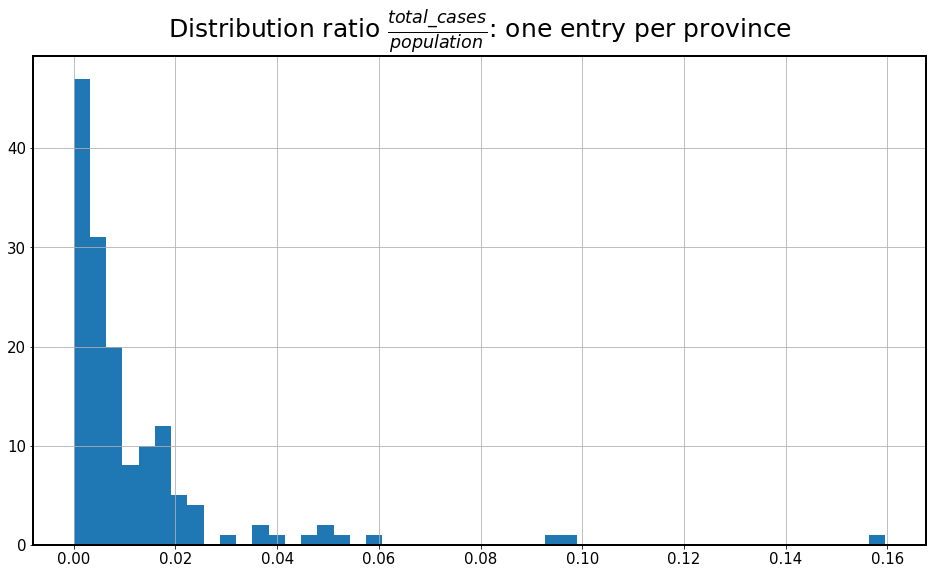

In [75]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['figure.figsize'] = [16, 9]

plt.hist(last_update['frac'], bins=50)
plt.title(r"Distribution ratio $\frac{total\_cases}{population}$: one entry per province")
plt.grid()

Saving figure total_cases_region_name_plot_sns


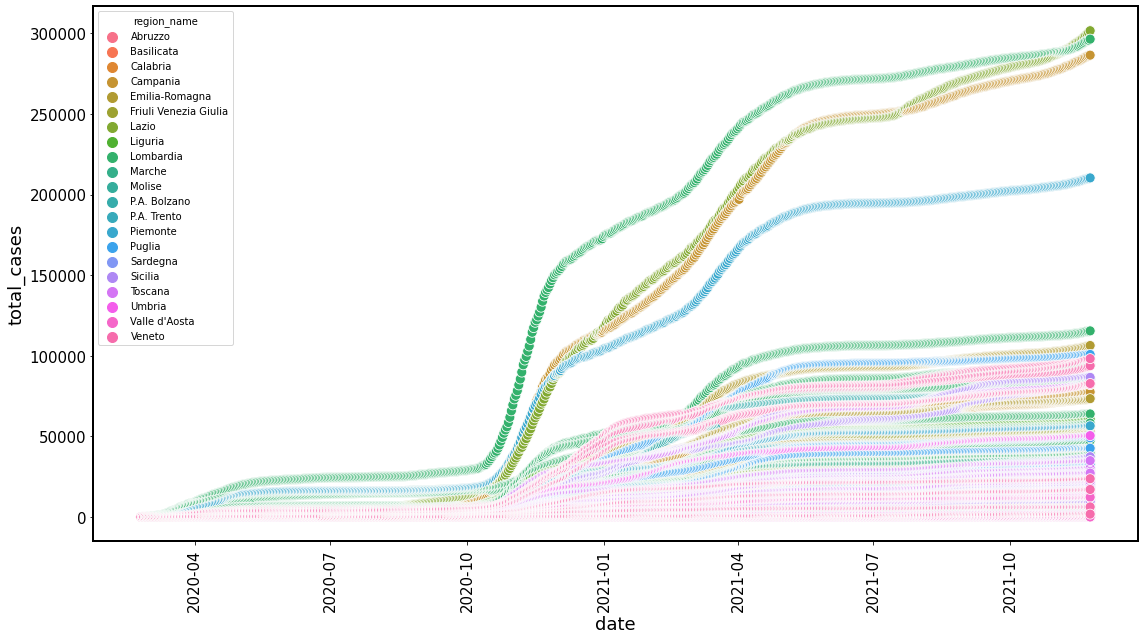

In [76]:
sns.scatterplot(data=cp_df_new, x='date', y='total_cases', hue="region_name")
plt.xticks(rotation=90)
save_fig("total_cases_region_name_plot_sns")
plt.show()

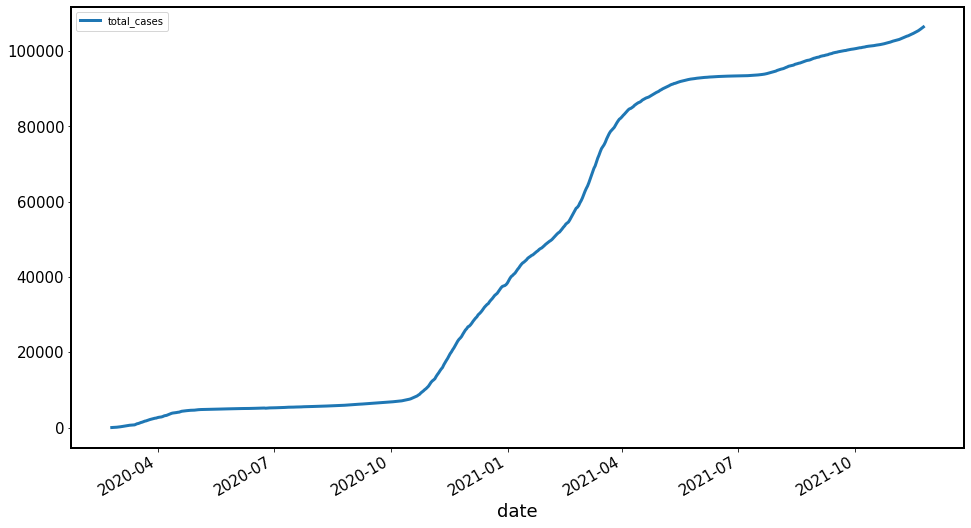

In [77]:
cp_df_new.query("region_name == 'Emilia-Romagna'")[['date','total_cases']].groupby('date').max().plot()
plt.show()

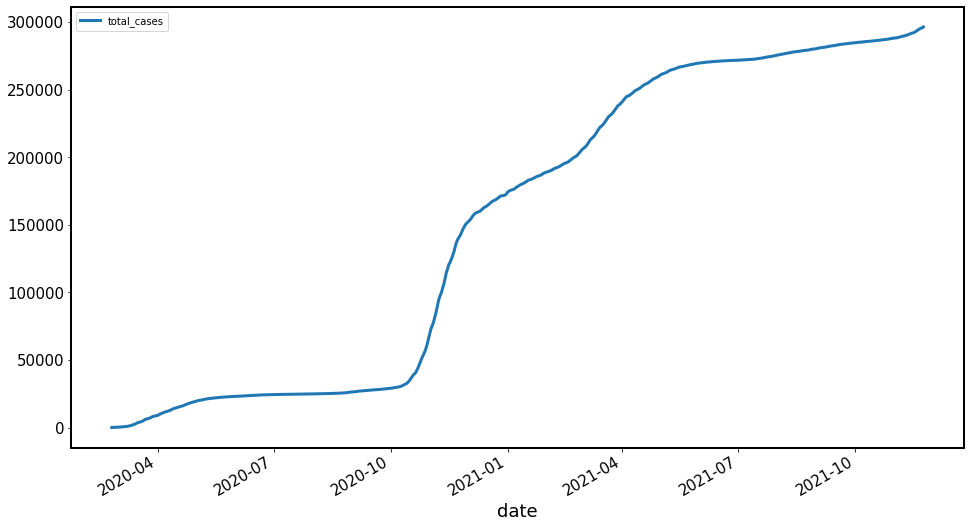

In [78]:
cp_df_new.query("region_name == 'Lombardia'")[['date','total_cases']].groupby('date').max().plot()
plt.show()